# COMPARING DIFFERENT CLASSIFICATION MODELS

It's easy to use models with sklearn or Dataiku's DSS without knowing what they really do or to know to math without really knowing what's behind so I wanted to really get into details and get of feel of how different classification models behave.

I decided to compare :
* Logistic Regression
* Naive Bayes
* k Nearest Neighbours (k = 1,3,7)

I decided to work on the Iris dataset.

Also it was nice to have fun with matplotlib.

# Getting a look at the data

In [14]:
# IMPORTS
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import numpy as np

To compare the different models I decided to plot the decision boundary between different classes of the Iris dataset, using PCA to be in 2D.

This way you can see linear / non linear boundaries and overfitting.

In [10]:
# DATASET

iris = datasets.load_iris()

iris.data, iris.target = shuffle(iris.data, iris.target, random_state=7)

# percentage of data used for training 
# the rest if used for visualization / test
percentage = 0.5 

x_train = iris.data[:int(percentage*len(iris.data)),:]
y_train = iris.target[:int(percentage*len(iris.data))]
x_test = iris.data[int(percentage*len(iris.data)):,:]
y_test = iris.target[int(percentage*len(iris.data)):]

# PCA to be able to visualize in 2D
p = PCA(n_components=2)
x_test_pca = p.fit_transform(x_test)

In [11]:
# PLOT FUNCTION

def plot():
    clf.fit(x_train, y_train) 
    
    # MESHGRID
    # we create a grid of points 
    # then we predict the class for those points
    # this is how we determine the color of a 'zone'
    
    # creation of the grid
    x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1 
    y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_to_predict = np.c_[xx.ravel(), yy.ravel()]

    # reverse PCA to be able to do the prediction 
    # NB what we get is of course an approximation
    grid_2_p_4D = p.inverse_transform(grid_to_predict)                                             
    Z = clf.predict(grid_2_p_4D)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='winter')

    # Compare with test data to see how well the model did 
    y_test.shape = (len(y_test), 1)
    data = np.concatenate((x_test_pca, y_test), axis=1)
    plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='winter', s=30)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.show()

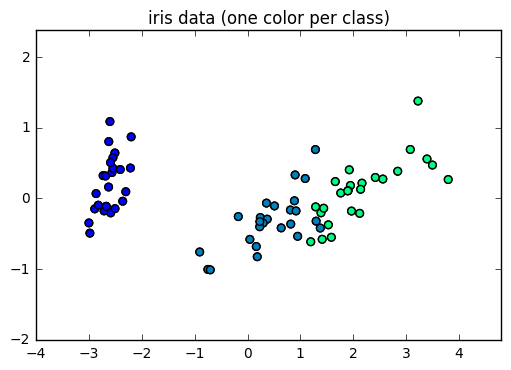

In [22]:
# looking at the data
x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1 
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1

y_test.shape = (len(y_test), 1)
data = np.concatenate((x_test_pca, y_test), axis=1)
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='winter', s=30)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('iris data (one color per class)')
plt.show()

## Logistic Regression

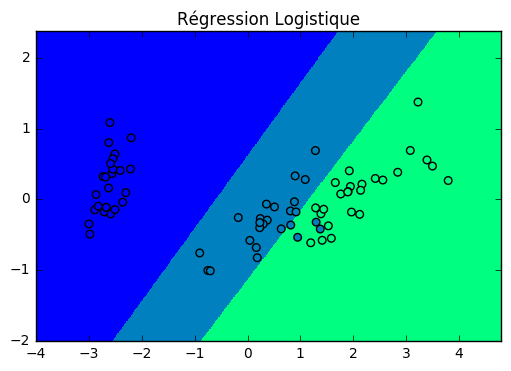

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
title = 'Régression Logistique'
plot()

Your typical linear decision boundary.

## Nearest Neighbours

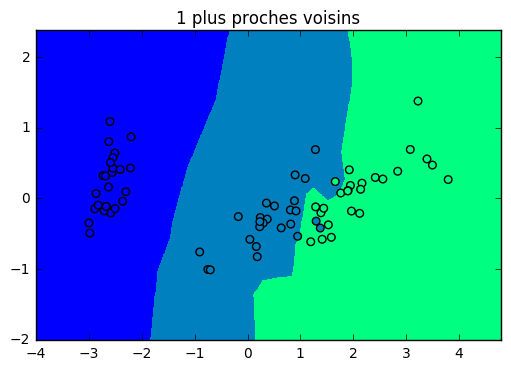

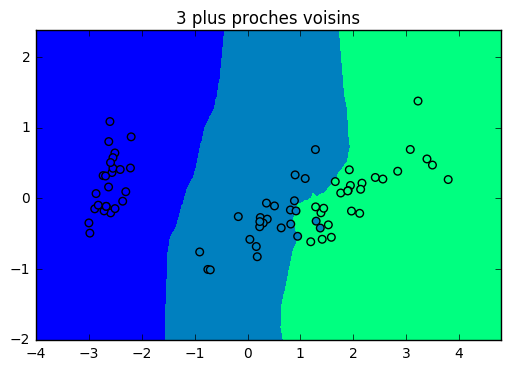

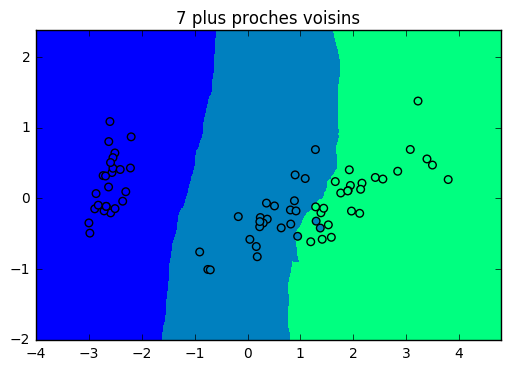

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
title = '1 plus proches voisins'
plot()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
title = '3 plus proches voisins'
plot()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
title = '7 plus proches voisins'
plot()

Overfitting for low values of k.

## Naïve Bayes

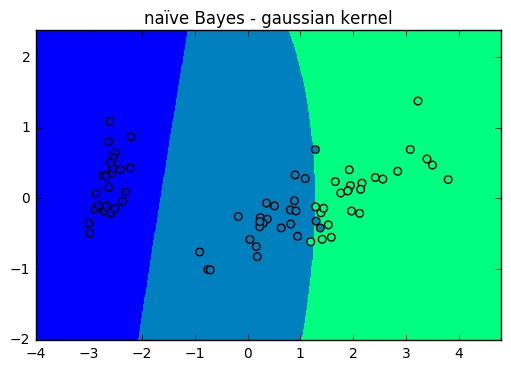

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
title = 'naïve Bayes - gaussian kernel'
plot()